Logistic Regression Model Evaluation:
--------------------------------------
Accuracy: 0.8625954198473282
Confusion Matrix:
 [[65 11]
 [ 7 48]]


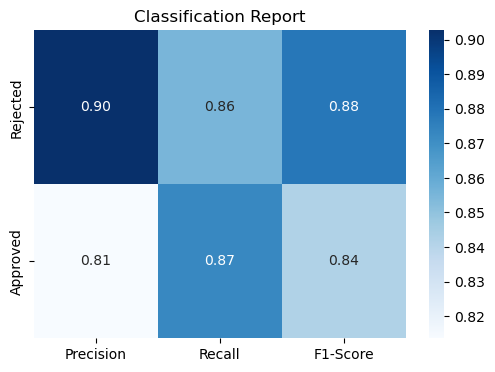

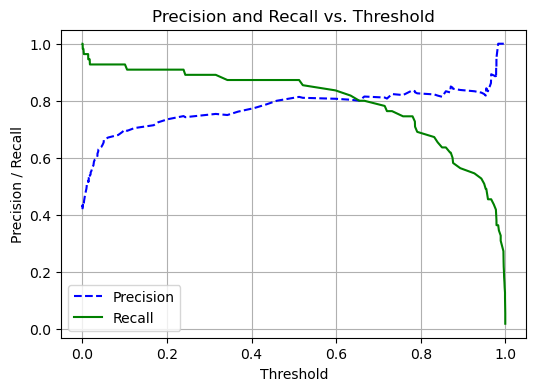


Description of the Dataset and Its Features:
------------------------------------------------
The Credit Approval dataset contains 690 records with 16 features.
It includes both numerical features (e.g., Age, Debt, Years Employed, etc.)
and categorical ones (e.g., Gender, Marital Status, Employment Type, etc.).

Classification Problem:
------------------------------------------------
We are predicting whether a credit application should be approved (1) or rejected (0).
This is a binary classification problem addressed using Logistic Regression.

Business Decision Supported:
------------------------------------------------
Financial institutions can use this model to automate the credit screening process.
It helps flag potentially risky applicants, reduce manual effort, and improve approval efficiency.


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load and Pre-process the Data
# -------------------------------

file_path = 'data/crx.data'  # Update this path if running locally
df = pd.read_csv(file_path, header=None)

# Assign proper column names
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 
              'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Class']

# Replace '?' with NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert target: '+' → 1 (Approved), '-' → 0 (Rejected)
df['Class'] = df['Class'].map({'+': 1, '-': 0})

# Identify categorical columns (others are numeric)
categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -------------------------------
# 2. Train/Test Split + Scaling
# -------------------------------

X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 3. Train Logistic Regression Model
# -------------------------------

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for positive class

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print("--------------------------------------")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

# -------------------------------
# 4. Classification Report Heatmap
# -------------------------------

report_dict = classification_report(y_test, y_pred, 
                                    target_names=['Rejected','Approved'],
                                    output_dict=True)

precision_rejected = report_dict['Rejected']['precision']
recall_rejected    = report_dict['Rejected']['recall']
f1_rejected        = report_dict['Rejected']['f1-score']

precision_approved = report_dict['Approved']['precision']
recall_approved    = report_dict['Approved']['recall']
f1_approved        = report_dict['Approved']['f1-score']

report_matrix = np.array([
    [precision_rejected, recall_rejected, f1_rejected],
    [precision_approved, recall_approved, f1_approved]
])

plt.figure(figsize=(6, 4))
sns.heatmap(report_matrix, annot=True, cmap='Blues', fmt=".2f",
            xticklabels=['Precision','Recall','F1-Score'],
            yticklabels=['Rejected','Approved'])
plt.title('Classification Report')
plt.show()

# -------------------------------
# 5. Precision and Recall vs. Threshold
# -------------------------------

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# -------------------------------
# 6. Explanation
# -------------------------------

print("\nDescription of the Dataset and Its Features:")
print("------------------------------------------------")
print("The Credit Approval dataset contains 690 records with 16 features.")
print("It includes both numerical features (e.g., Age, Debt, Years Employed, etc.)")
print("and categorical ones (e.g., Gender, Marital Status, Employment Type, etc.).")

print("\nClassification Problem:")
print("------------------------------------------------")
print("We are predicting whether a credit application should be approved (1) or rejected (0).")
print("This is a binary classification problem addressed using Logistic Regression.")

print("\nBusiness Decision Supported:")
print("------------------------------------------------")
print("Financial institutions can use this model to automate the credit screening process.")
print("It helps flag potentially risky applicants, reduce manual effort, and improve approval efficiency.")
